# Section 5: Evaluation and Conclusions
- [Section 5.1: Results](#results)
- [Section 5.2: Futrure Work](#future)

## Section 5.1: Results <a class="anchor" id="results"></a>

Description and graphs of our reults. Were they what we thought.

In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns

In [2]:
# Read data from pickled checkpoint
olympic_df = pd.read_pickle('../data/checkpoints/olympic-tweets-post-sentiment.pkl')

In [3]:
# Create ancillary dataframes for plotting
scatter_df = olympic_df[['id', 'sentiment', 'polarity', 'compound', 'sport']]
df = olympic_df[['id','sentiment', 'sport']]
bar_df = pd.DataFrame(df.groupby(by=['sport', 'sentiment'])['id'].count()).reset_index()

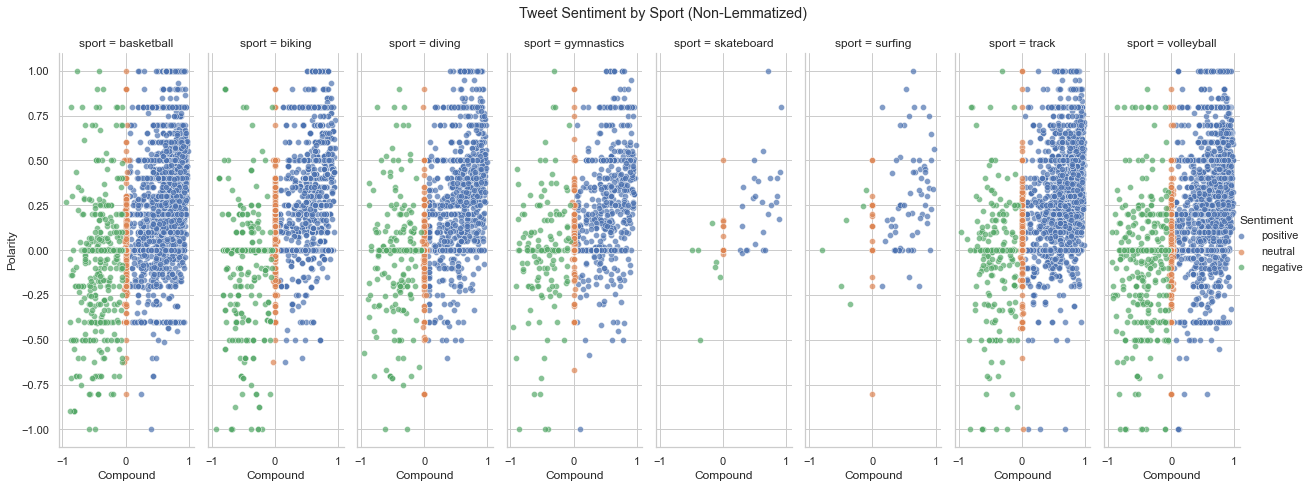

In [6]:
# Scatter plots for compound and polarity
sns.set_theme(style='whitegrid')

g = sns.FacetGrid(data=scatter_df, col='sport', hue='sentiment')
g.map(sns.scatterplot, 'compound', 'polarity', alpha=0.7)
g.add_legend(title='Sentiment')
g.set_axis_labels(x_var='Compound', y_var='Polarity')
g.fig.suptitle('Tweet Sentiment by Sport')
plt.subplots_adjust(top=0.9)
g.fig.set_size_inches(18, 8)


Text(0, 0.5, 'Percentage')

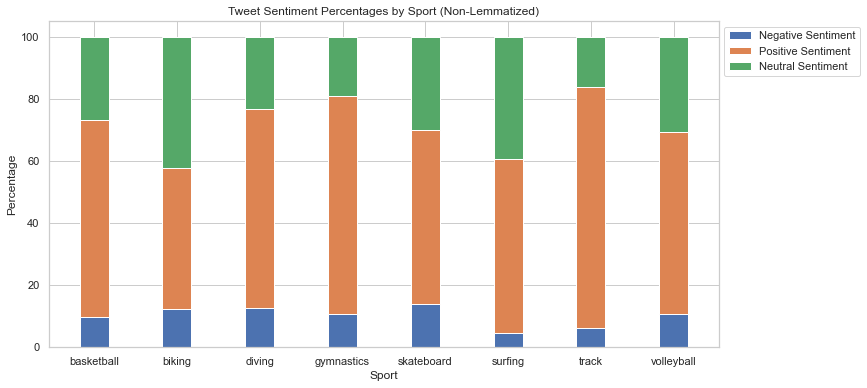

In [8]:
# Bar plots for sentiment distribution
neg = bar_df.id[bar_df.sentiment == 'negative'].values
pos = bar_df.id[bar_df.sentiment == 'positive'].values
neu = bar_df.id[bar_df.sentiment == 'neutral'].values

totals = [ i + j + k for i, j, k in zip(neg, pos, neu) ]
neg_adj = [ i / j * 100 for i, j in zip(neg, totals) ]
pos_adj = [ i / j * 100 for i, j in zip(pos, totals) ]
neu_adj = [ i / j * 100 for i, j in zip(neu, totals) ]

labels = list(olympic_df.sport.unique())

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(labels, neg_adj, width=0.35, label='Negative Sentiment')
ax.bar(labels, pos_adj, width=0.35, bottom=neg_adj, label='Positive Sentiment')
ax.bar(labels, neu_adj, width=0.35, bottom=[i + j for i,j in zip(neg_adj, pos_adj)], label='Neutral Sentiment')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)
plt.title('Tweet Sentiment Percentages by Sport')
plt.xlabel('Sport')
plt.ylabel('Percentage')

## Section 5.2: Future Work <a class="anchor" id="future"></a>

There are several areas where improvements can be made or into which we would invest additional time/resources. A few examples include:

* Exploration and comparison between originating tweet sentiment and tweet reply sentiment to analyze differences
* Time-series analysis of sentiment over time for given sport(s)


<div class="container">
   <div style="float:left;width:20%"><a href="./Model.ipynb"><< Section 4: Model Creation</a></div>
   <div style="float:right;width:20%"><a href="./OlympicTweets.ipynb">Appendix 1: Master Code >></a></div>
   <div style="float:right;width:40%"><a href="../main.md">Table of Contents</a></div>
</div>